In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('df_merged.csv')
df.head(10)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_period,campaign_Year,...,median_discount_percent,total_item_customer_purchased,buying_frequency,item_purchased_Food & Dairy_category,item_purchased_Garden_category,item_purchased_Grocery_category,item_purchased_Health & Personal care_category,item_purchased_Meat & Fish_category,item_purchased_Miscellaneous_category,no_of_coupon_discount
0,1,13,27,1053,0,X,19-05-2013,07-05-2013,-12,2013,...,0.000000,70,24,0,0,41,6,17,6,0
1,2,13,116,48,0,X,19-05-2013,07-05-2013,-12,2013,...,11.033443,156,29,4,0,98,30,21,3,6
2,6,9,635,205,0,Y,03-11-2013,04-12-2013,31,2013,...,0.000000,298,26,7,0,207,45,38,1,29
3,7,13,644,1050,0,X,19-05-2013,07-05-2013,-12,2013,...,0.000000,76,23,1,0,63,11,0,1,0
4,9,8,1017,1489,0,X,16-02-2013,04-05-2013,77,2013,...,15.970748,101,18,3,0,60,19,15,4,1
5,11,11,795,793,0,Y,22-04-2013,06-07-2013,75,2013,...,0.000000,697,47,9,0,431,178,65,14,15
6,14,9,444,590,0,Y,03-11-2013,04-12-2013,31,2013,...,0.000000,581,64,16,2,345,156,41,21,1
7,15,29,538,368,0,Y,10-08-2012,30-11-2012,112,2012,...,0.000000,841,77,44,1,601,156,27,12,2
8,17,30,857,523,0,X,19-11-2012,01-04-2013,133,2012,...,9.658239,136,41,0,0,120,5,11,0,10
9,19,2,559,679,0,Y,17-12-2012,18-01-2013,32,2012,...,4.834417,601,24,21,0,467,72,40,1,0


In [12]:
print('Total Number of rows in the given data: ',df.shape[0])
print('Total Number of columns in the given data: ',df.shape[1])

Total Number of rows in the given data:  78357
Total Number of columns in the given data:  43


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78357 entries, 0 to 78356
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              78357 non-null  int64  
 1   campaign_id                                     78357 non-null  int64  
 2   coupon_id                                       78357 non-null  int64  
 3   customer_id                                     78357 non-null  int64  
 4   redemption_status                               78357 non-null  int64  
 5   campaign_type                                   78357 non-null  object 
 6   start_date                                      78357 non-null  object 
 7   end_date                                        78357 non-null  object 
 8   campaign_period                                 78357 non-null  int64  
 9   campaign_Year                          

In [14]:
df['campaign_type'] = df['campaign_type'].replace({'X':0,'Y':1})

In [15]:
df['campaign_type'].value_counts()

0    57675
1    20682
Name: campaign_type, dtype: int64

In [16]:
df=df.drop(['id','campaign_id','coupon_id','customer_id','median_other_discount','start_date','end_date'],axis=1)
df.head(10)

,redemption_status,campaign_type,campaign_period,campaign_Year,campaign_month,campaign_quarter,customer_nunique,coupon_nunique,category_count_Food & Dairy,category_count_Garden,...,median_discount_percent,total_item_customer_purchased,buying_frequency,item_purchased_Food & Dairy_category,item_purchased_Garden_category,item_purchased_Grocery_category,item_purchased_Health & Personal care_category,item_purchased_Meat & Fish_category,item_purchased_Miscellaneous_category,no_of_coupon_discount
0,0,0,-12,2013,5,6,1077,207,0,0,...,0.000000,70,24,0,0,41,6,17,6,0
1,0,0,-12,2013,5,6,1077,207,0,0,...,11.033443,156,29,4,0,98,30,21,3,6
2,0,1,31,2013,11,8,176,18,0,0,...,0.000000,298,26,7,0,207,45,38,1,29
3,0,0,-12,2013,5,6,1077,207,0,0,...,0.000000,76,23,1,0,63,11,0,1,0
4,0,0,77,2013,2,5,1076,208,0,0,...,15.970748,101,18,3,0,60,19,15,4,1
5,0,1,75,2013,4,6,214,13,0,0,...,0.000000,697,47,9,0,431,178,65,14,15
6,0,1,31,2013,11,8,176,18,0,0,...,0.000000,581,64,16,2,345,156,41,21,1
7,0,1,112,2012,8,3,118,33,0,0,...,0.000000,841,77,44,1,601,156,27,12,2
8,0,0,133,2012,11,4,361,178,0,0,...,9.658239,136,41,0,0,120,5,11,0,10
9,0,1,32,2012,12,4,48,16,0,0,...,4.834417,601,24,21,0,467,72,40,1,0


In [17]:
df.columns

Index(['redemption_status', 'campaign_type', 'campaign_period',
       'campaign_Year', 'campaign_month', 'campaign_quarter',
       'customer_nunique', 'coupon_nunique', 'category_count_Food & Dairy',
       'category_count_Garden', 'category_count_Grocery',
       'category_count_Health & Personal care', 'category_count_Meat & Fish',
       'category_count_Miscellaneous', 'category_count_Established',
       'category_count_Local', 'coupon_unique_brand', 'coupon_item_count',
       'average_item_quantity_purchased', 'average_selling_price',
       'average_other_discount', 'average_coupon_discount',
       'average_discount_percent', 'median_item_quantity_purchased',
       'median_selling_price', 'median_coupon_discount',
       'median_discount_percent', 'total_item_customer_purchased',
       'buying_frequency', 'item_purchased_Food & Dairy_category',
       'item_purchased_Garden_category', 'item_purchased_Grocery_category',
       'item_purchased_Health & Personal care_category'

In [31]:
cat_cols=['campaign_type','campaign_period','campaign_Year','campaign_month',
          'campaign_quarter','customer_nunique','coupon_nunique','category_count_Food & Dairy',
          'category_count_Garden','category_count_Grocery', 'category_count_Health & Personal care',
          'category_count_Meat & Fish', 'category_count_Miscellaneous',
          'category_count_Established', 'category_count_Local','buying_frequency',
          'item_purchased_Food & Dairy_category',
          'item_purchased_Garden_category', 'item_purchased_Grocery_category',
          'item_purchased_Health & Personal care_category',
          'item_purchased_Meat & Fish_category',
          'item_purchased_Miscellaneous_category','no_of_coupon_discount','total_item_customer_purchased']
num_cols=['average_item_quantity_purchased', 'average_selling_price',
          'average_other_discount', 'average_coupon_discount',
          'average_discount_percent', 'median_item_quantity_purchased',
          'median_selling_price','median_coupon_discount', 'median_discount_percent']

In [32]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print('-'*50)

campaign_type
0    57675
1    20682
Name: campaign_type, dtype: int64
--------------------------------------------------
campaign_period
-12     22600
 77     22552
 133     6467
-78      6056
 32      4290
 112     3894
 31      3168
 75      2782
-289     1826
 62      1722
 182     1584
 61       476
 56       408
 63       324
 37       143
-25        65
Name: campaign_period, dtype: int64
--------------------------------------------------
campaign_Year
2013    59821
2012    18536
Name: campaign_Year, dtype: int64
--------------------------------------------------
campaign_month
2     24136
5     22600
11     9635
12     9201
8      5940
4      5332
7       972
9       476
1        65
Name: campaign_month, dtype: int64
--------------------------------------------------
campaign_quarter
6    27932
5    24201
4    13842
8     4994
3     4694
7     2694
Name: campaign_quarter, dtype: int64
--------------------------------------------------
customer_nunique
1077    22600
1076    22552


**Statstical test for Categorical Columns**

        - Null Hypothesis Ho : The proportions of the feature is equal across the redemption status(The feature is not significant)
        - Alternate Hypothesis Ha : The proportions of the feature is not equal to the redemption status(The feature is significant)

In [33]:
from scipy.stats import chi2_contingency
non_sig=[]
cat_features=[]
c_pval=[]
for i in cat_cols:
    print(i,'Feature')
    cat_features.append(i)
    print('Ho',i,'is not significant to Redemption status')
    print('Ha',i,'is significant to Redemption status')
    obs=pd.crosstab(df[i],df['redemption_status'])
    chi,p,ddof,exp=chi2_contingency(obs)
    print('pvalue : ',p)
    c_pval.append(p)
    if(p<0.05):
        print('We are rejecting the null hypothesis',i,'is significant to redemption staus\n')
    else:
        print('We failed to reject null hypothesis',i,'is not significant to redemption staus\n')
        non_sig.append(i)
print('The Variable not significant to  redemption status is',non_sig)
cat_summary=pd.DataFrame()
cat_summary['categorical_features']=cat_features
cat_summary['P_Value']=c_pval
cat_summary['P_Value']=cat_summary['P_Value']

campaign_type Feature
Ho campaign_type is not significant to Redemption status
Ha campaign_type is significant to Redemption status
pvalue :  4.264635303903236e-17
We are rejecting the null hypothesis campaign_type is significant to redemption staus

campaign_period Feature
Ho campaign_period is not significant to Redemption status
Ha campaign_period is significant to Redemption status
pvalue :  3.302199268417304e-25
We are rejecting the null hypothesis campaign_period is significant to redemption staus

campaign_Year Feature
Ho campaign_Year is not significant to Redemption status
Ha campaign_Year is significant to Redemption status
pvalue :  2.746231246869437e-06
We are rejecting the null hypothesis campaign_Year is significant to redemption staus

campaign_month Feature
Ho campaign_month is not significant to Redemption status
Ha campaign_month is significant to Redemption status
pvalue :  6.447697160193067e-27
We are rejecting the null hypothesis campaign_month is significant to re

In [34]:
cat_summary

,categorical_features,P_Value
0,campaign_type,4.264635e-17
1,campaign_period,3.302199e-25
2,campaign_Year,2.746231e-06
3,campaign_month,6.447697e-27
4,campaign_quarter,3.633648e-15
5,customer_nunique,8.620279e-25
6,coupon_nunique,9.168364e-25
7,category_count_Food & Dairy,4.851992e-49
8,category_count_Garden,1.201429e-01
9,category_count_Grocery,0.000000e+00


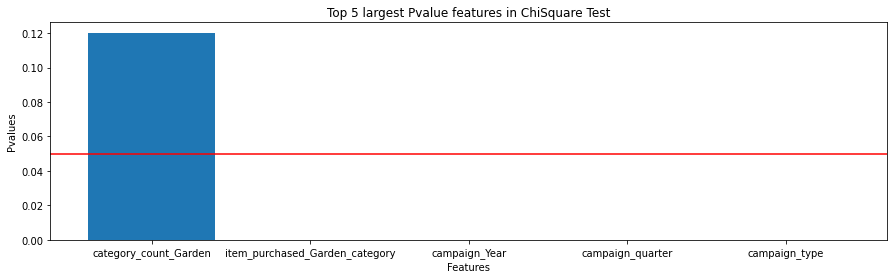

In [35]:
cat_summary_top_5=cat_summary.sort_values(by='P_Value',ascending=False).head(5)
plt.figure(figsize=(15,4))
plt.bar('categorical_features','P_Value',data=cat_summary_top_5)
plt.title('Top 5 largest Pvalue features in ChiSquare Test')
plt.ylabel('Pvalues')
plt.xlabel('Features')
plt.axhline(y=0.05,color='red')
plt.show()

**Inferences**

- Categorical features have the multiple categories so we did chisquare test
- Here we focus on there should be significant differences in proportions between the categories in redemption status
- We reject null hypothesis if pvalue is less than the 0.05
- Category Count Garden is insignificant feature the proportion of the categories in this feature is equal across the redemption status


**Statstical test for Numerical Columns**

- Null Hypothesis Ho : The average value between the two groups(Redemption status) are equal(The feature is not significant)
        
- Alternate Hypothesis Ha : The average value between the two groups(Redemption status) are not equal(The feature is significant)

In [36]:
df0=df[df['redemption_status']==0]
df1=df[df['redemption_status']==1]

df0.shape,df1.shape

((77640, 36), (717, 36))

**Shapiro Test**

- We do shapiro test for normality
- If the data is normal we can go for the Independent ttest
- If the data is not normal we can go for mannwhitneyu test(transforming the features and doing the ttest)

    - Null Hypothesis Ho : Data is normal
    - Alternate Hypothesis Ha : Data is not normal

In [50]:
from scipy.stats import shapiro,mannwhitneyu,ttest_ind
print('Shapiro Test')
print()
for i in num_cols:
    print(i)
    print('Pvalue of group 0 of the feature',i,'is',shapiro(df0[i])[1])
    print('Pvalue of group 1 of the feature',i,'is',shapiro(df1[i])[1])
    print()

Shapiro Test

average_item_quantity_purchased
Pvalue of group 0 of the feature average_item_quantity_purchased is 0.0
Pvalue of group 1 of the feature average_item_quantity_purchased is 2.405672132137308e-38

average_selling_price
Pvalue of group 0 of the feature average_selling_price is 0.0
Pvalue of group 1 of the feature average_selling_price is 0.0

average_other_discount
Pvalue of group 0 of the feature average_other_discount is 0.0
Pvalue of group 1 of the feature average_other_discount is 8.37605976409299e-26

average_coupon_discount
Pvalue of group 0 of the feature average_coupon_discount is 0.0
Pvalue of group 1 of the feature average_coupon_discount is 3.113389808549055e-13

average_discount_percent
Pvalue of group 0 of the feature average_discount_percent is 0.0
Pvalue of group 1 of the feature average_discount_percent is 6.847478865691543e-18

median_item_quantity_purchased
Pvalue of group 0 of the feature median_item_quantity_purchased is 0.0
Pvalue of group 1 of the featu

In [38]:
non_sig_num=[]
num_features=[]
n_pval=[]
for i in num_cols:
    print(i,'Feature')
    num_features.append(i)
    print('Ho',i,'is not significant to Exited')
    print('Ha',i,'is significant to Exited')
    pval = ttest_ind(df0[i],df1[i])[1]
    print('Pvalue : ',pval)
    n_pval.append(pval)
    if(pval<0.05):
        print('We are rejecting the null hypothesis',i,'is significant to redemption status\n')
    else:
        print('We failed to reject null hypothesis',i,'is not significant to redemption status\n')
        non_sig_num.append(i)
print('The Variable not significant to redemption status is',non_sig_num)
num_summary=pd.DataFrame()
num_summary['Numerical_features']=num_features
num_summary['P_Value']=n_pval

average_item_quantity_purchased Feature
Ho average_item_quantity_purchased is not significant to Exited
Ha average_item_quantity_purchased is significant to Exited
Pvalue :  1.4170590261675238e-07
We are rejecting the null hypothesis average_item_quantity_purchased is significant to redemption status

average_selling_price Feature
Ho average_selling_price is not significant to Exited
Ha average_selling_price is significant to Exited
Pvalue :  0.08732803513645826
We failed to reject null hypothesis average_selling_price is not significant to redemption status

average_other_discount Feature
Ho average_other_discount is not significant to Exited
Ha average_other_discount is significant to Exited
Pvalue :  0.35300530428763666
We failed to reject null hypothesis average_other_discount is not significant to redemption status

average_coupon_discount Feature
Ho average_coupon_discount is not significant to Exited
Ha average_coupon_discount is significant to Exited
Pvalue :  0.186260811602304

In [39]:
num_summary

,Numerical_features,P_Value
0,average_item_quantity_purchased,1.417059e-07
1,average_selling_price,8.732804e-02
2,average_other_discount,3.530053e-01
3,average_coupon_discount,1.862608e-01
4,average_discount_percent,1.084941e-05
5,median_item_quantity_purchased,2.679030e-10
6,median_selling_price,1.018882e-67
7,median_coupon_discount,1.972182e-28
8,median_discount_percent,1.382399e-26


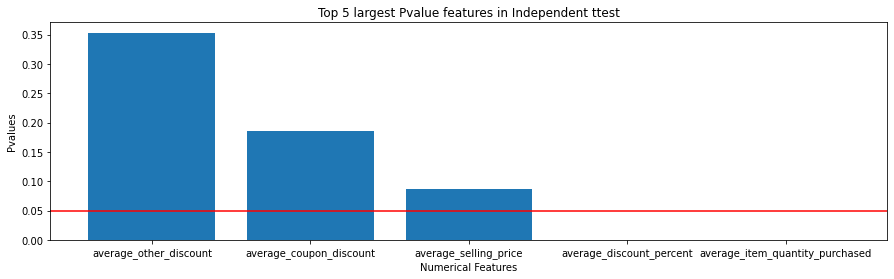

In [40]:
num_summary_top_5=num_summary.sort_values('P_Value',ascending=False).head(5)
plt.figure(figsize=(15,4))
plt.bar('Numerical_features','P_Value',data=num_summary_top_5)
plt.title('Top 5 largest Pvalue features in Independent ttest')
plt.ylabel('Pvalues')
plt.xlabel('Numerical Features')
plt.axhline(y=0.05,color='red')
plt.show()

**Inferences**

- Numerical features are not normal we found in shapiro test
- So we have to do mannwhitneyu test before that we performed independent ttest to check the features importance without any transform though the features are not normal
- Here we focus on there should be significant differences in average between the categories in redemption status
- We reject null hypothesis if pvalue is less than the 0.05
- 'Average_selling_price', 'Average_other_discount', 'Average_coupon_discount' is insignificant features p value is greater than the 0.05
- we can conclude after mannwhitneyu test 

In [41]:
non_sig_num=[]
num_features=[]
n_pval=[]
for i in num_cols:
    print(i,'Feature')
    num_features.append(i)
    print('Ho',i,'is not significant to redemption status')
    print('Ha',i,'is significant to redemption status')
    pval = mannwhitneyu(df0[i],df1[i])[1]
    print('Pvalue : ',pval)
    n_pval.append(pval)
    if(pval<0.05):
        print('We are rejecting the null hypothesis',i,'is significant to redemption status\n')
    else:
        print('We failed to reject null hypothesis',i,'is not significant to redemption status\n')
        non_sig_num.append(i)
print('The Variable not significant to  redemption status is',non_sig_num)
num_summary=pd.DataFrame()
num_summary['Numerical_features']=num_features
num_summary['P_Value']=n_pval

average_item_quantity_purchased Feature
Ho average_item_quantity_purchased is not significant to redemption status
Ha average_item_quantity_purchased is significant to redemption status
Pvalue :  4.967555608150436e-17
We are rejecting the null hypothesis average_item_quantity_purchased is significant to redemption status

average_selling_price Feature
Ho average_selling_price is not significant to redemption status
Ha average_selling_price is significant to redemption status
Pvalue :  0.03665995581122191
We are rejecting the null hypothesis average_selling_price is significant to redemption status

average_other_discount Feature
Ho average_other_discount is not significant to redemption status
Ha average_other_discount is significant to redemption status
Pvalue :  0.008605819256015541
We are rejecting the null hypothesis average_other_discount is significant to redemption status

average_coupon_discount Feature
Ho average_coupon_discount is not significant to redemption status
Ha avera

In [42]:
num_summary

,Numerical_features,P_Value
0,average_item_quantity_purchased,4.967556e-17
1,average_selling_price,3.665996e-02
2,average_other_discount,8.605819e-03
3,average_coupon_discount,3.073016e-01
4,average_discount_percent,9.695250e-13
5,median_item_quantity_purchased,3.181261e-14
6,median_selling_price,2.896384e-87
7,median_coupon_discount,7.826665e-22
8,median_discount_percent,5.118195e-21


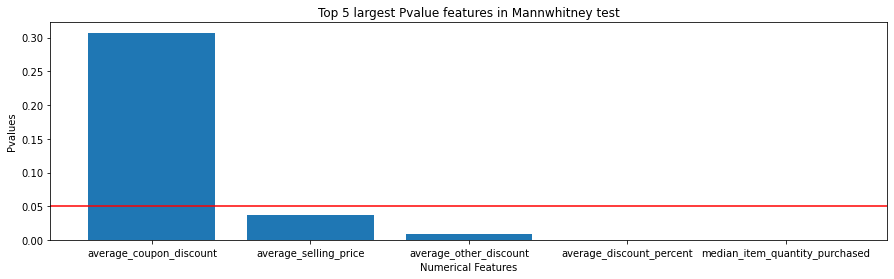

In [43]:
num_summary_top_5=num_summary.sort_values('P_Value',ascending=False).head(5)
plt.figure(figsize=(15,4))
plt.bar('Numerical_features','P_Value',data=num_summary_top_5)
plt.title('Top 5 largest Pvalue features in Mannwhitney test')
plt.ylabel('Pvalues')
plt.xlabel('Numerical Features')
plt.axhline(y=0.05,color='red')
plt.show()

**Inferences**
- Here in Mannwhitneyu test 'Average_selling_price' and 'Average_other_discount' features have become significant
- So if perform transformation we can use those two feature for predicting redemption status
- We reject null hypothesis if pvalue is less than the 0.05
- 'Average_coupon_discount' is insignificant feature
- we can conclude that Average_coupon_discount is insignificant though we do transformation we cannot use that feature for prediction